## Data generators/processors: measure the average time incl. standard deviation required by your data generator loop over several runs and loops. Determine a reasonable number of runs and loop executions for the performance analysis.

In [1]:
!pip install kafka-python
!pip install snakeviz

In [2]:
from kafka import KafkaConsumer, KafkaProducer
import json
import uuid
import random
import time
import cProfile
import os
import io
import pstats
from pstats import SortKey

In [3]:
def connect_kafka_producer(servers):
    _producer = None
    try:
        _producer = KafkaProducer(bootstrap_servers=servers, api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _producer

In [4]:
def publish_message(producer_instance, topic_name, key, value):
    try:
        key_bytes = bytes(key, encoding='utf-8')
        value_bytes = bytes(value, encoding='utf-8')
        producer_instance.send(topic_name, key=key_bytes, value=value_bytes)
        producer_instance.flush()
        print('Message published successfully.')
    except Exception as ex:
        print('Exception in publishing message')
        print(str(ex))

In [5]:
servers = ['broker1:9093', 'broker2:9094', 'broker3:9095']
topic = "products"
producer = connect_kafka_producer(servers)

In [70]:
stats = {"run": [], "n_loops": [], "time": []}
n_item = 0
for run in range(100):
    start = time.time()
    with open("data.json") as file:
        data = json.load(file)
    len_max = len(data)
    for loop in range(101):
        product = data[random.randint(1, len_max-1)]
        message = json.dumps({"product": product})
        publish_message(producer, topic, str(uuid.uuid4()), message)
        print("Published items so far: {}".format(n_item))
        n_item += 1
    end = time.time()
    stats["run"].append(run)
    stats["n_loops"].append(loop)
    stats["time"].append(end - start)

Message published successfully.
Published items so far: 0
Message published successfully.
Published items so far: 1
Message published successfully.
Published items so far: 2
Message published successfully.
Published items so far: 3
Message published successfully.
Published items so far: 4
Message published successfully.
Published items so far: 5
Message published successfully.
Published items so far: 6
Message published successfully.
Published items so far: 7
Message published successfully.
Published items so far: 8
Message published successfully.
Published items so far: 9
Message published successfully.
Published items so far: 10
Message published successfully.
Published items so far: 11
Message published successfully.
Published items so far: 12
Message published successfully.
Published items so far: 13
Message published successfully.
Published items so far: 14
Message published successfully.
Published items so far: 15
Message published successfully.
Published items so far: 16
Message

In [71]:
for run in range(100):
    start = time.time()
    with open("data.json") as file:
        data = json.load(file)
    len_max = len(data)
    for loop in range(51):
        product = data[random.randint(1, len_max-1)]
        message = json.dumps({"product": product})
        publish_message(producer, topic, str(uuid.uuid4()), message)
        print("Published items so far: {}".format(n_item))
        n_item += 1
    end = time.time()
    stats["run"].append(run)
    stats["n_loops"].append(loop)
    stats["time"].append(end - start)

Message published successfully.
Published items so far: 10100
Message published successfully.
Published items so far: 10101
Message published successfully.
Published items so far: 10102
Message published successfully.
Published items so far: 10103
Message published successfully.
Published items so far: 10104
Message published successfully.
Published items so far: 10105
Message published successfully.
Published items so far: 10106
Message published successfully.
Published items so far: 10107
Message published successfully.
Published items so far: 10108
Message published successfully.
Published items so far: 10109
Message published successfully.
Published items so far: 10110
Message published successfully.
Published items so far: 10111
Message published successfully.
Published items so far: 10112
Message published successfully.
Published items so far: 10113
Message published successfully.
Published items so far: 10114
Message published successfully.
Published items so far: 10115
Message 

In [72]:
for run in range(100):
    start = time.time()
    with open("data.json") as file:
        data = json.load(file)
    len_max = len(data)
    for loop in range(81):
        product = data[random.randint(1, len_max-1)]
        message = json.dumps({"product": product})
        publish_message(producer, topic, str(uuid.uuid4()), message)
        print("Published items so far: {}".format(n_item))
        n_item += 1
    end = time.time()
    stats["run"].append(run)
    stats["n_loops"].append(loop)
    stats["time"].append(end - start)

Message published successfully.
Published items so far: 15200
Message published successfully.
Published items so far: 15201
Message published successfully.
Published items so far: 15202
Message published successfully.
Published items so far: 15203
Message published successfully.
Published items so far: 15204
Message published successfully.
Published items so far: 15205
Message published successfully.
Published items so far: 15206
Message published successfully.
Published items so far: 15207
Message published successfully.
Published items so far: 15208
Message published successfully.
Published items so far: 15209
Message published successfully.
Published items so far: 15210
Message published successfully.
Published items so far: 15211
Message published successfully.
Published items so far: 15212
Message published successfully.
Published items so far: 15213
Message published successfully.
Published items so far: 15214
Message published successfully.
Published items so far: 15215
Message 

<Axes: xlabel='n_loops'>

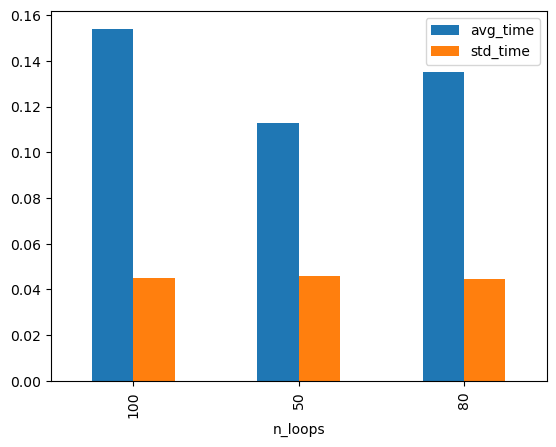

In [73]:
# save stats
import pandas as pd
df = pd.DataFrame(stats)
df.head()
# calc avg for n_loops equal, make new col
df["avg_time"] = df.groupby("n_loops")["time"].transform("mean")
# calc std for n_loops equal, make new col
df["std_time"] = df.groupby("n_loops")["time"].transform("std")
# plot avg and std of n_loops unique next to each
df = df.drop_duplicates(subset="n_loops")
df.plot(x="n_loops", y=["avg_time", "std_time"], kind="bar")

In [7]:
# read stats.txt with pandas
import pandas as pd
df = pd.read_csv('stats.txt', sep='\s+\s+', skiprows=5, header=None, error_bad_lines=False)
df.columns = ['ncalls', 'tottime', 'percall', 'cumtime', 'percall filename:lineno(function)']
df.head()

/tmp/ipykernel_204/2154001296.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('stats.txt', sep='\s+\s+', skiprows=5, header=None, error_bad_lines=False)
/tmp/ipykernel_204/2154001296.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('stats.txt', sep='\s+\s+', skiprows=5, header=None, error_bad_lines=False)


,ncalls,tottime,percall,cumtime,percall filename:lineno(function)
0,30,15.104,0.503,15.104,0.503 {built-in method time.sleep}
1,1,0.226,0.226,0.229,0.229 {method 'read' of '_io.TextIOWrapper' ob...
2,150,0.199,0.001,0.199,0.001 {method 'acquire' of '_thread.lock' obje...
3,1,0.056,0.056,0.056,0.056 /opt/conda/lib/python3.10/json/decoder.p...
4,30,0.027,0.001,0.027,0.001 /opt/conda/lib/python3.10/json/encoder.p...


In [8]:
df['percall filename:lineno(function)'].str.split('\s+', expand=True).iloc[:, 1:].values

df['function'] = [''.join(str(x)) for x in df['percall filename:lineno(function)'].str.split('\s+', expand=True).iloc[:, 1:].values]

In [9]:
# remove all special chars from column function except char /
df['function'] = df['function'].str.replace('[^\w\s/]', '')
df.head()
# remove None string from function column
df['function'] = df['function'].str.replace('None','')
df.head()

/tmp/ipykernel_204/2192852116.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['function'] = df['function'].str.replace('[^\w\s/]', '')


,ncalls,tottime,percall,cumtime,percall filename:lineno(function),function
0,30,15.104,0.503,15.104,0.503 {built-in method time.sleep},builtin method timesleep
1,1,0.226,0.226,0.229,0.229 {method 'read' of '_io.TextIOWrapper' ob...,method read of _ioTextIOWrapper objects
2,150,0.199,0.001,0.199,0.001 {method 'acquire' of '_thread.lock' obje...,method acquire of _threadlock objects
3,1,0.056,0.056,0.056,0.056 /opt/conda/lib/python3.10/json/decoder.p...,/opt/conda/lib/python310/json/decoderpy343raw_...
4,30,0.027,0.001,0.027,0.001 /opt/conda/lib/python3.10/json/encoder.p...,/opt/conda/lib/python310/json/encoderpy204iter...


In [10]:
df['percall'] = df['percall filename:lineno(function)'].str.split('\s+', expand=True)[0]

In [11]:
df.head()
#drop percall filename:lineno(function)
df.drop(columns=['percall filename:lineno(function)'], inplace=True)
df.head()

,ncalls,tottime,percall,cumtime,function
0,30,15.104,0.503,15.104,builtin method timesleep
1,1,0.226,0.229,0.229,method read of _ioTextIOWrapper objects
2,150,0.199,0.001,0.199,method acquire of _threadlock objects
3,1,0.056,0.056,0.056,/opt/conda/lib/python310/json/decoderpy343raw_...
4,30,0.027,0.001,0.027,/opt/conda/lib/python310/json/encoderpy204iter...


<Axes: xlabel='function'>

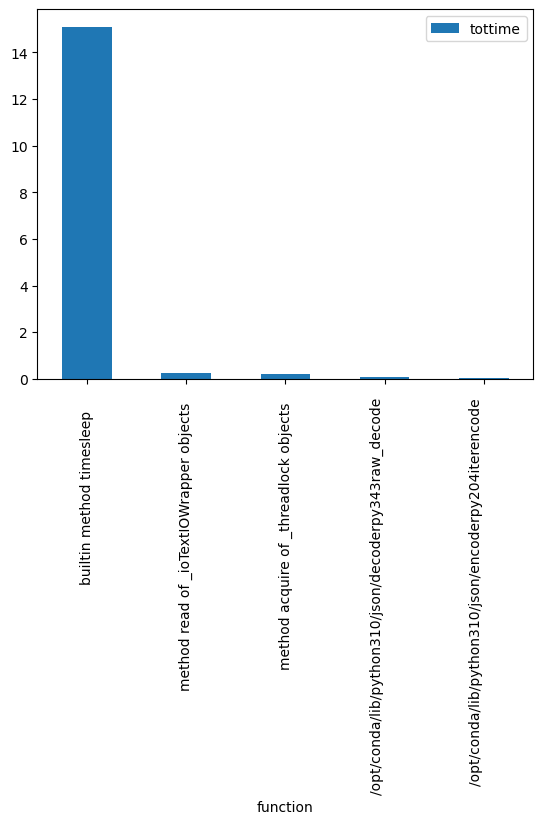

In [12]:
#plot only 5 highest tottime
df.sort_values(by=['tottime'], ascending=False).head(5).plot.bar(x='function', y='tottime')